In [1]:
#Import Library
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 

In [2]:
#Format Configuration
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size']=14
plt.rcParams['font.weight']='normal'
plt.style.use('seaborn-whitegrid')

In [3]:
from google.colab import files
files.upload()

Saving insurance.xlsx to insurance.xlsx


{'insurance.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

Data Exploration

In [4]:
insurance=pd.read_excel('insurance.xlsx')

In [5]:
#data awal
insurance.head()

,age,sex,bmi,overtime,smoker,Unit kerja,charges
0,40,female,27.900,217,yes,Field,158.849240
1,24,male,33.770,14,no,Field,7.255523
2,28,male,33.000,4,no,Field,34.494620
3,60,male,22.705,164,no,headquarter,209.844706
4,25,male,28.880,3,no,headquarter,28.668552


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   overtime    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   Unit kerja  1338 non-null   object 
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Mengubah data string/object menjadi integer/numerik
insurance.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance.replace({'Unit kerja':{'headquarter':0,'warehouse':1,"production":2,"Field":3}},inplace=True)

In [8]:
#data komversi
insurance.head()

,age,sex,bmi,overtime,smoker,Unit kerja,charges
0,40,1,27.900,217,0,3,158.849240
1,24,0,33.770,14,1,3,7.255523
2,28,0,33.000,4,1,3,34.494620
3,60,0,22.705,164,1,0,209.844706
4,25,0,28.880,3,1,0,28.668552


In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   int64  
 2   bmi         1338 non-null   float64
 3   overtime    1338 non-null   int64  
 4   smoker      1338 non-null   int64  
 5   Unit kerja  1338 non-null   int64  
 6   charges     1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [10]:
insurance.tail()

,age,sex,bmi,overtime,smoker,Unit kerja,charges
1333,31,0,30.97,76,1,0,96.005483
1334,20,1,31.92,0,1,2,12.059808
1335,21,1,36.85,5,1,1,6.298335
1336,23,1,25.80,9,1,3,10.079450
1337,47,1,29.07,134,0,0,281.413603


In [11]:
insurance.shape

(1338, 7)

In [12]:
insurance.isnull().sum()

age           0
sex           0
bmi           0
overtime      0
smoker        0
Unit kerja    0
charges       0
dtype: int64

Regresi adalah salah satu analisis statistik mengenai persebaran data berdasarkan variabel dependen dan independen. Regresi biasa digunakan untuk melihat tren, mengukur korelasi dan pengaruh, serta membuat prediksi.

Visualisasi regresi dalam Seaborn biasa menggunakan lm atau lmplot. Fungsi yang digunakan adalah lmplot(). Untuk menggunakan lmplot(), kita perlu memasukkan variabel x (independen) dan variabel y (dependen) ke dalam parameter.

In [13]:
insurance.describe()

,age,sex,bmi,overtime,smoker,Unit kerja,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,35.919283,0.494768,30.679981,96.389387,0.795217,1.494021,122.704223
std,10.913657,0.500160,6.114019,77.474884,0.403694,1.109708,121.100112
min,20.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1.218739
25%,28.000000,0.000000,26.296250,19.250000,1.000000,1.000000,37.402872
50%,33.000000,0.000000,30.400000,84.000000,1.000000,1.000000,83.820330
75%,44.000000,1.000000,34.752500,163.750000,1.000000,2.000000,156.399125
max,65.000000,1.000000,53.130000,250.000000,1.000000,3.000000,627.704280


Missing Data

HeatMap Missing Data

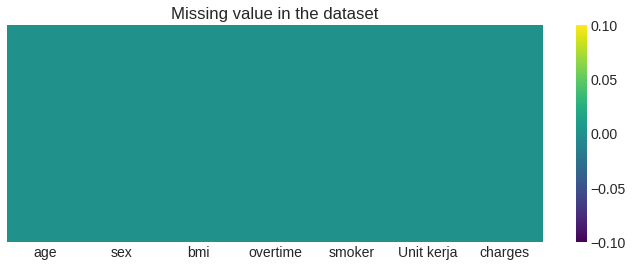

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance.isnull(),cbar=True,cmap="viridis",yticklabels=False)
plt.title('Missing value in the dataset');

HeatMap Korelasi data

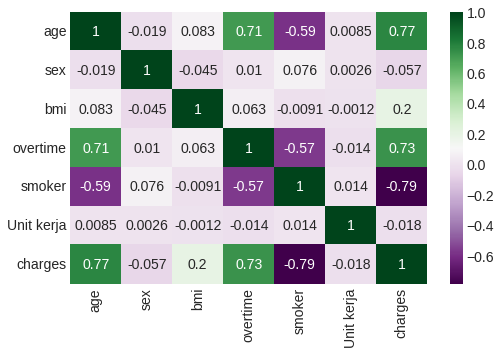

In [15]:
sns.heatmap(insurance.corr(),cmap='PRGn',annot=True)

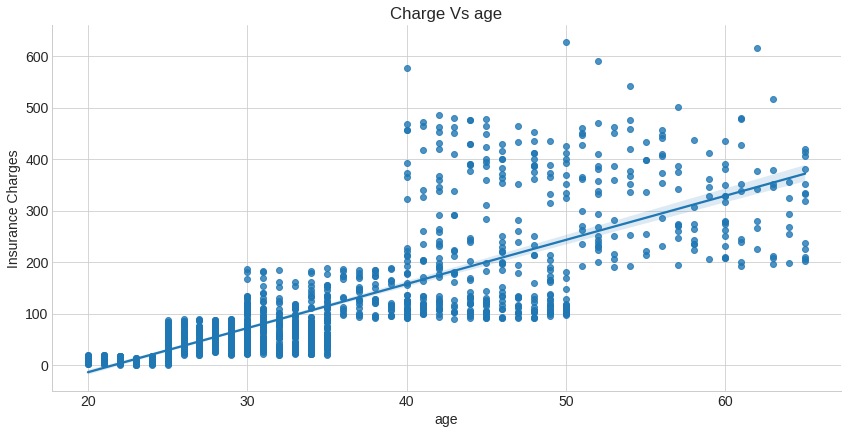

In [16]:
sns.lmplot(x='age',y='charges',data=insurance,aspect=2,height=6)
plt.xlabel('age')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs age');

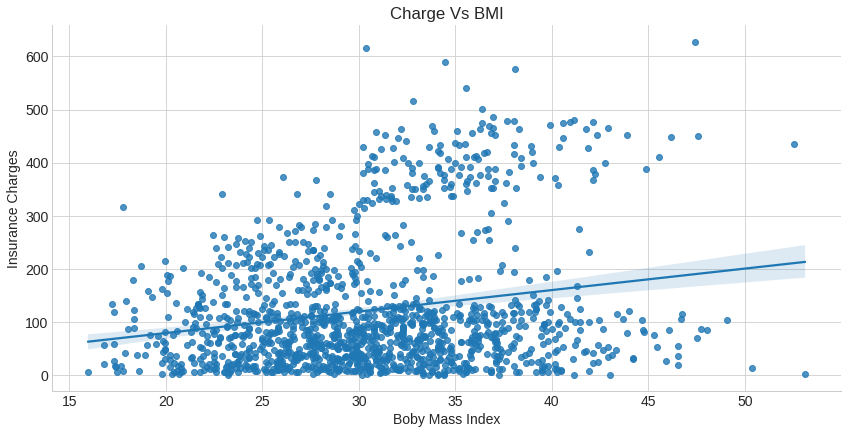

In [17]:
sns.lmplot(x='bmi',y='charges',data=insurance,aspect=2,height=6)
plt.xlabel('Boby Mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');

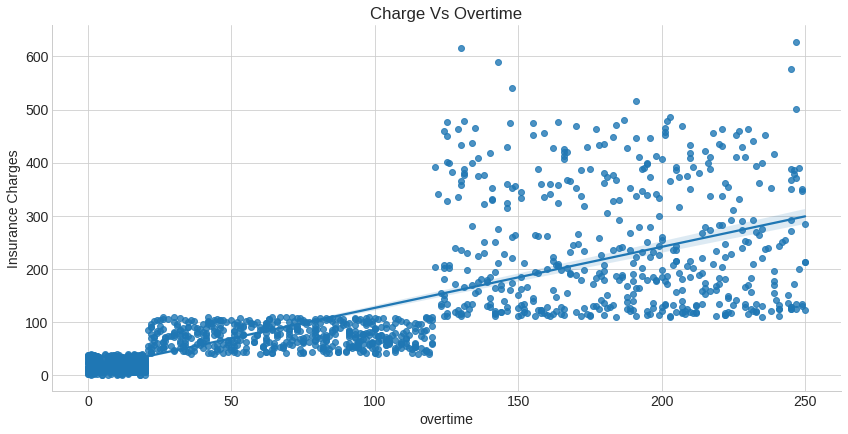

In [18]:
sns.lmplot(x='overtime',y='charges',data=insurance,aspect=2,height=6)
plt.xlabel('overtime')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs Overtime');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


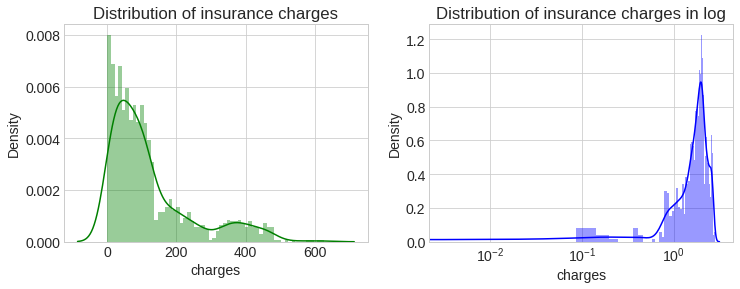

In [19]:
p=plt.figure(figsize=(12,4))
ax=p.add_subplot(121)
sns.distplot(insurance['charges'],bins=60,color='g',ax=ax)
ax.set_title("Distribution of insurance charges")
ax=p.add_subplot(122)
sns.distplot(np.log10(insurance['charges']),bins=50,color='b',ax=ax)
ax.set_title("Distribution of insurance charges in log")
ax.set_xscale("log")

jika kita melihat plot kiri biayanya bervariasi hampir 600, plotnya miring ke kanan

Di plot kanan kita akan menerapkan log dan plotnya miring ke kiri

Dari petak kiri, biaya asuransi laki-laki dan perempuan hampir sama

Dari kanan, biaya asuransi untuk perokok jauh lebih luas dibandingkan dengan bukan perokok

Text(0.5, 1.0, '\nBox plot of charges vs overtime')

<Figure size 1008x432 with 0 Axes>

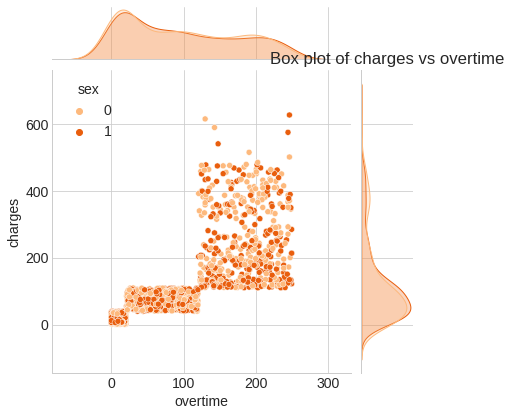

In [20]:
p=plt.figure(figsize=(14,6))
sns.jointplot(x='overtime',y='charges',hue='sex',data=insurance,palette='Oranges')
plt.title("\nBox plot of charges vs overtime")

In [21]:
insurance.groupby('overtime').agg(['mean','min','max'])['charges']

,mean,min,max
overtime,,,
0,18.359377,2.428160,37.796023
1,19.750272,1.374697,39.923764
2,20.596213,2.539360,38.947533
3,22.958530,2.562990,36.733922
4,23.869301,7.288970,35.188263
...,...,...,...
246,312.169796,172.464955,386.117577
247,351.998098,124.579608,627.704280
248,295.327930,200.821600,389.834259


Pair Plot Untuk melihat distribusi atribut tunggal atau hubungan 2 atribut data

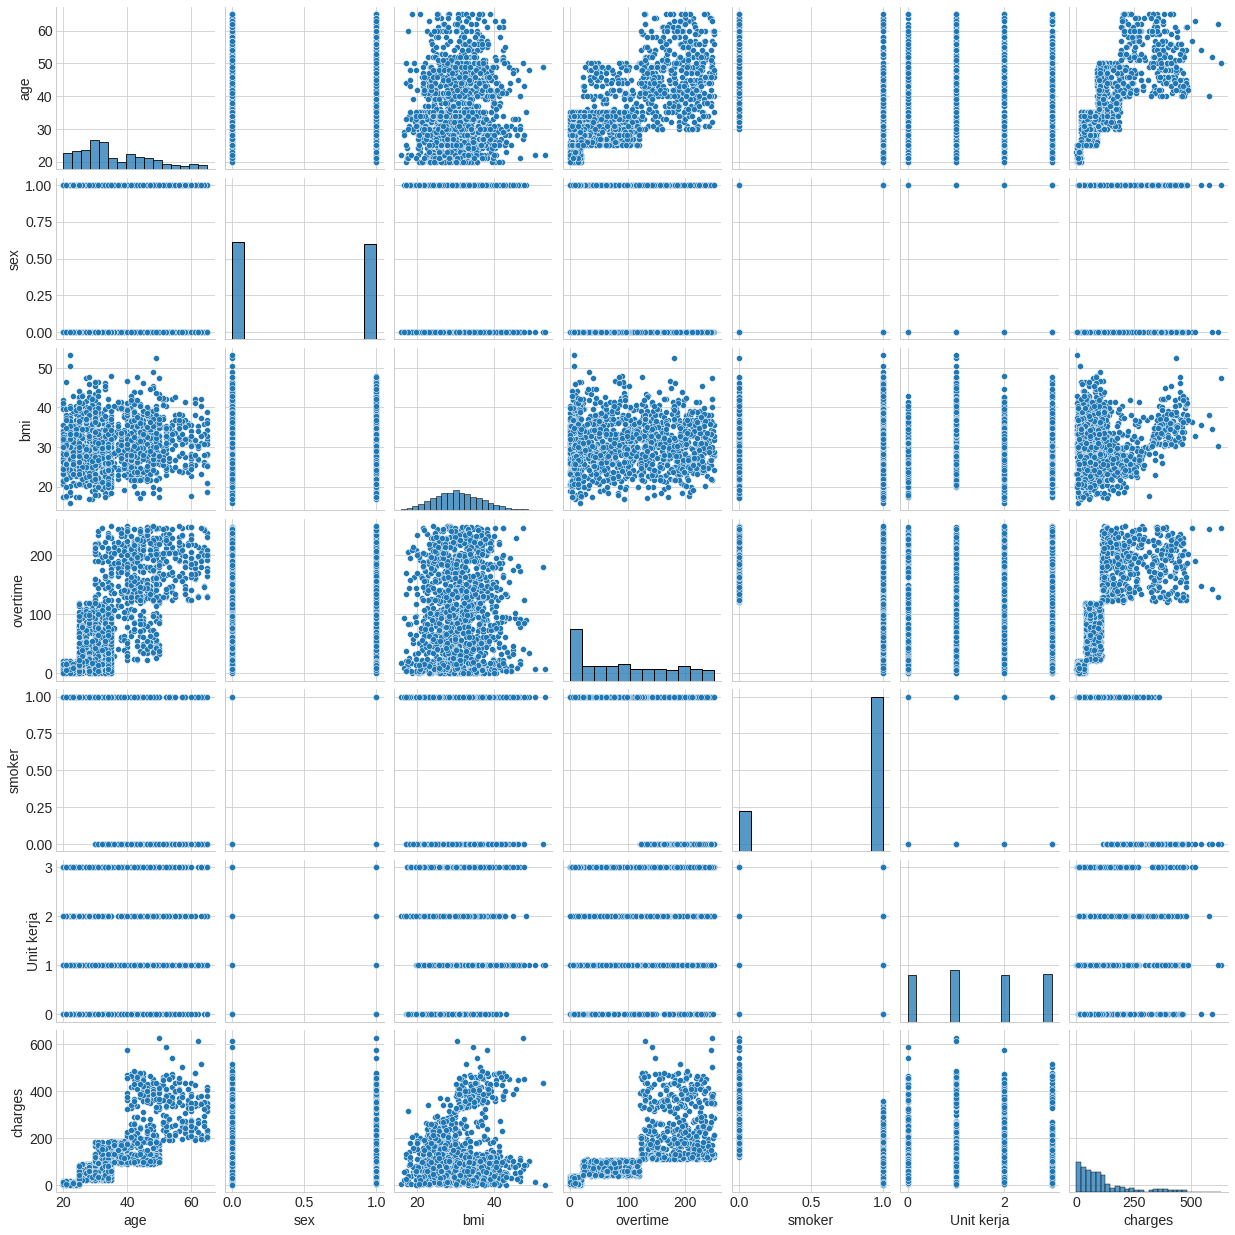

In [22]:
sns.pairplot(insurance)

Text(0.5, 1.0, 'Scatter plot Charges vs Bmi')

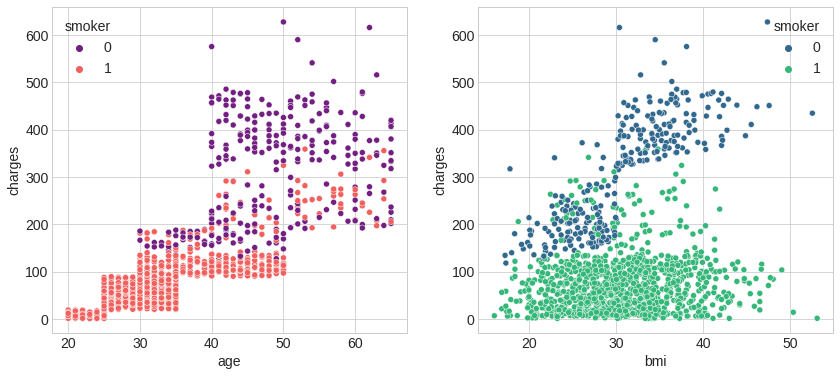

In [23]:
p=plt.figure(figsize=(14,6))
sns.scatterplot(x='age',y='charges',data=insurance,palette="magma",hue="smoker",ax=p.add_subplot(121))
ax.set_title("Scatter plot Charges vs Age")

sns.scatterplot(x="bmi",y='charges',data=insurance,palette="viridis",hue='smoker',ax=p.add_subplot(122))
ax.set_title("Scatter plot Charges vs Bmi")

sns.scatterplot untuk menemukan suatu pola persebaran data dan menentukan korelasi antara variabel-variabel pada data.

Data Pre-Processing

Model Building

linear regression equation

*  y= XB+c+e
*  y=traget
*  X= data
*  B=coefficient
*  e=error




using sckit-learn

In [24]:
X=insurance.drop(columns='charges',axis=1)
Y=insurance['charges']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

Train data menggunakan scikit

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [29]:
trainingdataprediction=regressor.predict(X_train)

In [30]:
r2=metrics.r2_score(Y_train,trainingdataprediction)
print("R square : ",r2)

R square :  0.8202702691971615


In [31]:
test_predict=regressor.predict(X_test)

In [32]:
r2_test=metrics.r2_score(Y_test,test_predict)
print("R2 value : ",r2_test)

R2 value :  0.8040134427707435


Value R menandakan keakurasian prediksi data

In [33]:
input_data = (30,1,25.47,1,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[22.68807666]
The insurance cost is USD  22.68807666110014


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Simulasi prediksi data menggunakan metode input data pada list (age=30,sex=1,bmi=25.47,overtime=1,smoker=1,unit kerja=0)

In [34]:
X_const_train=sm.add_constant(X_train)
modelsm= sm.OLS(Y_train, X_const_train).fit()
modelsm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     706.6
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:57:16   Log-Likelihood:                -5039.4
No. Observations:                 936   AIC:                         1.009e+04
Df Residuals:                     929   BIC:                         1.013e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.7634     13.459     -1.617      0.106     -48.178       4.651
age            3.4868      0.236     14.774      0.000       3.024       3.950
sex           -2.1684      3.481     -0.623      0.533      -9.000       4.663
bmi            3.2444      0.285     11.390      0.000       2.685       3.803
overtime       0.3948      0.033     12.129      0.000       0.331       0.459
smoker      -141.0136      5.517    -25.560      0.000    -151.841    -130.186
Unit kerja    -2.1083      1.578     -1.336      0.182      -5.205       0.988
==============================================================================
Omnibus:                       97.443   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.249
Skew:                           0.499   Prob(JB):                     8.57e-67
Kurtosis:                       5.608   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.head()

,age,sex,bmi,overtime,smoker,Unit kerja
0,40,1,27.900,217,0,3
1,24,0,33.770,14,1,3
2,28,0,33.000,4,1,3
3,60,0,22.705,164,1,0
4,25,0,28.880,3,1,0
